# Initializing QTLab stuff

In [3]:
%run C:\qtlab_replacement\init.py
import matplotlib.pyplot as plt
from instruments import *
import numpy as np
import sweep
import pandas as pd
from save_pkl import *
from IPython.display import clear_output

In [2]:
import os
os.chdir("C:\qtlab_replacement\instruments\_labbrick")

In [ ]:
#import ctypes
#ctypes.windll.LoadLibrary("C:\qtlab_replacement\instruments\_labbrick\vnx_fmsynth.dll")

# Initializing Voltage/Current sourses:

In [32]:
current_src_1 = Yokogawa_GS210(address='gs210_1')
current_src_3 = Yokogawa_GS210(address='gs210_3')
current_src_4 = Yokogawa_GS210(address='gs210_4')
current_src_5 = Yokogawa_GS210(address='gs210_5')
current_src_7 = Yokogawa_GS210(address='gs210_7')

#pna = Agilent_N5242A('pna', address = 'PNA')
#pxa = Agilent_N9030A('pxa', address = 'PXA')
#lo1 = Agilent_E8257D('lo1', address = 'PSG1')
#awg_tek = Tektronix_AWG5014('awg_tek', address = 'TCPIP0::10.20.61.186::inst0::INSTR')

KeyboardInterrupt: 

In [5]:
current_src_1.set_src_mode_volt()                                   # switch Yokogawa to the Voltage mode
current_src_1.set_range(10)                                         # set voltage Source Range
current_src_1.set_voltage_limits(minvoltage = -5, maxvoltage = 5)   # set the +- maximum voltage ranges in [volts]
current_src_3.set_src_mode_volt()                                   # switch Yokogawa to the Voltage mode
current_src_3.set_range(10)                                         # set voltage Source Range
current_src_3.set_voltage_limits(minvoltage = -5, maxvoltage = 5)   # set the +- maximum voltage ranges in [volts]
current_src_4.set_src_mode_volt()                                   # switch Yokogawa to the Voltage mode
current_src_4.set_range(10)                                         # set voltage Source Range
current_src_4.set_voltage_limits(minvoltage = -5, maxvoltage = 5)   # set the +- maximum voltage ranges in [volts]
current_src_5.set_src_mode_volt()                                   # switch Yokogawa to the Voltage mode
current_src_5.set_range(10)                                         # set voltage Source Range
current_src_5.set_voltage_limits(minvoltage = -5, maxvoltage = 5)   # set the +- maximum voltage ranges in [volts]

In [6]:
current_src_1.get_status()                                          # check he status 0 - off, 1 - on

0

In [7]:
current_src_1.set_voltage(0.0)
current_src_3.set_voltage(1.0)
current_src_4.set_voltage(4.5)
current_src_5.set_voltage(0.5)

Voltage set 0e+00 V
Voltage set 1e+00 V
Voltage set 4.5e+00 V
Voltage set 5e-01 V


True

In [13]:
current_src_7.set_status(0)

True

# Slow ramp the voltage on multiple sourses

In [9]:
src_list = [current_src_1,current_src_3,current_src_4]
CB_MB_OB = np.array([2, 2, 2])                           # Volts
STEP = 0.01                                              # Volts

CB_MB_OB_now = np.array([src_list[0].get_voltage(),src_list[1].get_voltage(),src_list[2].get_voltage()])

In [10]:
number_list = [abs(CB_MB_OB[0]-CB_MB_OB_now[0]),abs(CB_MB_OB[1]-CB_MB_OB_now[1]),abs(CB_MB_OB[2]-CB_MB_OB_now[2])]
max_value = max(number_list)
max_index = number_list.index(max_value)

In [11]:
steps_CB = list(np.linspace(CB_MB_OB_now[0], CB_MB_OB[0], int(number_list[0]/STEP+1)))
steps_MB = list(np.linspace(CB_MB_OB_now[1], CB_MB_OB[1], int(number_list[1]/STEP+1)))
steps_OB = list(np.linspace(CB_MB_OB_now[2], CB_MB_OB[2], int(number_list[2]/STEP+1)))

In [12]:
for i in np.linspace(CB_MB_OB_now[max_index], CB_MB_OB[max_index], int(number_list[max_index]/STEP+1)):
    clear_output(wait=True)
    if len(steps_CB):
        src_list[0].set_voltage(steps_CB[0])
        steps_CB.pop(0)
    if len(steps_MB):
        src_list[1].set_voltage(steps_MB[0])
        steps_MB.pop(0)
    if len(steps_OB):
        src_list[2].set_voltage(steps_OB[0])
        steps_OB.pop(0)
    sleep(0.1)

Voltage set 2e+00 V


# Initializing the Lock-In

In [14]:
Lock_In = NF_LI5650('Lock_In', address='LockIn_26')

In [15]:
Lock_In.make_connection()

connection to Lock_In
*IDN?  NF Corporation,LI5650,9235143,Ver1.40



In [16]:
Lock_In.read_outp_in_ascii()

[1.682499e-13, 4.994776e-14]

In [17]:
Lock_In.ask_IntOsc_frequency()

[2000.0]

In [18]:
Lock_In.set_IntOsc_frequency(2000, 'Hz')

In [19]:
Lock_In.ask_IntOsc_amp()

[0.0]

# Plotting Lockin vs Voltage

In [20]:
current_src_5.set_voltage(0.5)

Voltage set 5e-01 V


True

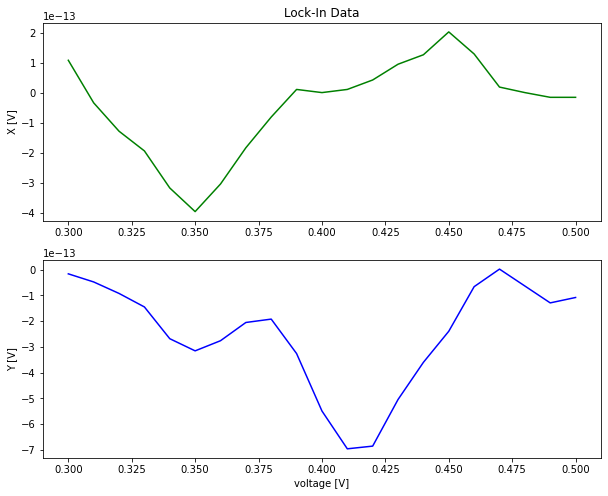

Voltage set 5e-01 V


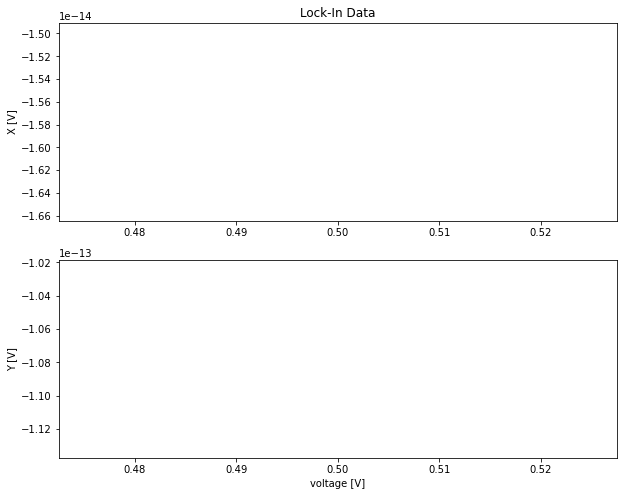

Voltage set 4.9e-01 V
Voltage set 4.8e-01 V
Voltage set 4.7e-01 V
Voltage set 4.6e-01 V
Voltage set 4.5e-01 V
Voltage set 4.4e-01 V
Voltage set 4.3e-01 V
Voltage set 4.2e-01 V
Voltage set 4.1e-01 V
Voltage set 4e-01 V
Voltage set 3.9e-01 V
Voltage set 3.8e-01 V
Voltage set 3.7e-01 V
Voltage set 3.6e-01 V
Voltage set 3.5e-01 V
Voltage set 3.4e-01 V
Voltage set 3.3e-01 V
Voltage set 3.2e-01 V
Voltage set 3.1e-01 V
Voltage set 3e-01 V


In [21]:
X = []
Y = []
Vlt = []

name = "Random valid name"+datetime.datetime.now().strftime("%Y%m%d%H%M%S.txt")
file = open(name,"w")

fig, ax = plt.subplots(2,1, figsize=(10,8))
hfig = display(fig, display_id=True)


plt.setp(ax[0].get_xticklabels(), visible=False)

final_voltage = 0.3
voltage_steps = np.linspace(current_src_5.get_voltage(), final_voltage, int(abs(final_voltage-current_src_5.get_voltage())/0.01+1))

for i in voltage_steps:
    #clear_output(wait=True)
    current_src_5.set_voltage(i)
    sleep(0.5)
    
    voltageXY = Lock_In.read_outp_in_string()
    
    filecontent = str(i) + ',' + voltageXY
    file.write(filecontent)
    
    res = Lock_In.read_outp_in_ascii()
    X.append(float(res[0]))
    Y.append(float(res[1]))
    Vlt.append(i)
    
    # dynamic plot
    ax[0].cla()
    ax[1].cla()
    ax[0].set_title('Lock-In Data')
    ax[0].set_ylabel('X [V]')
    ax[1].set_xlabel('voltage [V]')
    ax[1].set_ylabel('Y [V]')
    
    ax[0].plot(Vlt, X, 'g')
    ax[1].plot(Vlt, Y, 'b')
    
    hfig.update(fig)
    plt.pause(0.1)
    
file.close()

# Lab brick test

In [22]:
get_labbricks()

{1: {'name': 'LMS-183DX', 'serial_number': 27937}}

In [23]:
lo1 = Labbrick(name='LMS-183DX', serial=27937)

In [24]:
lo1.set_power(-20)
lo1.get_power()

-20.0

In [25]:
lo1.set_status(True)
lo1.set_power(-30)
lo1.set_frequency(6.003e9)

True

In [26]:
lo1.set_status(False)

True

SRS_SG386 Microwave signal generator 

A lot of troubles with an old python 2 driver here - better to rewright again

In [27]:
lo2 = SRS_SG380('SRS_SG386', address='Lo_27')  

root: WARNING  Get not implemented for SRS_SG380.timebase
root: WARNING  Get not implemented for SRS_SG380.timebase
root: WARNING  SRS_SG380 : answer to MFNC? was not expected : 3

root: WARNING  SRS_SG380 : answer to COUP? was not 0 or 1 : 0

root: WARNING  SRS_SG380 : answer to TYPE? was not expected : 3



In [28]:
lo2.get_status()

'1\r\n'

In [29]:
lo2.set_status(0)

root: WARNING  Unsupported type <class 'NoneType'>


False

# Keysight E5071CA Vector network Analyzer

In [4]:
vna = Keysight_E5071C('vna', address = 'VNA')

In [5]:
vna.set_trigger_source("INT")

True

In [5]:
vna.set_sweep_mode("LIN")

True

In [5]:
vna.set_xlim(3e9,10e9)
vna.set_nop(1001)
vna.set_average(1)
vna.set_averages(5)
vna.set_bandwidth(200)
vna.set_power(-20)

True

In [11]:
x,y = vna.get_tracedata(format = 'AMPPHA')

In [6]:
vna.get_tracedata(format = 'REALIMAG')

(array([-0.23112158,  0.34173539, -0.21052274, ...,  0.21042879,
        -0.17612672, -0.05261707]),
 array([ 0.41936544, -0.17705059, -0.01352295, ..., -0.08508311,
        -0.16671064,  0.33233628]))

In [12]:
freqs = vna.get_freqpoints()

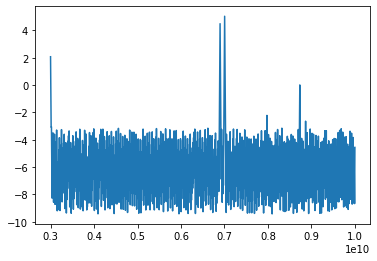

In [14]:
plt.plot(freqs, y)

Sweeps

In [5]:
current_src_5 = Yokogawa_GS210(address='gs210_5')
current_src_5.set_src_mode_volt()                                   # switch Yokogawa to the Voltage mode
current_src_5.set_range(10)                                         # set voltage Source Range
current_src_5.set_voltage_limits(minvoltage = -5, maxvoltage = 5)   # set the +- maximum voltage ranges in [volts]
current_src_5.set_voltage(-1)

Voltage set -1e+00 V


True

In [8]:
voltages = np.linspace(-1, 1, 11)

Started at:  Jan 24 2022 18:41:19


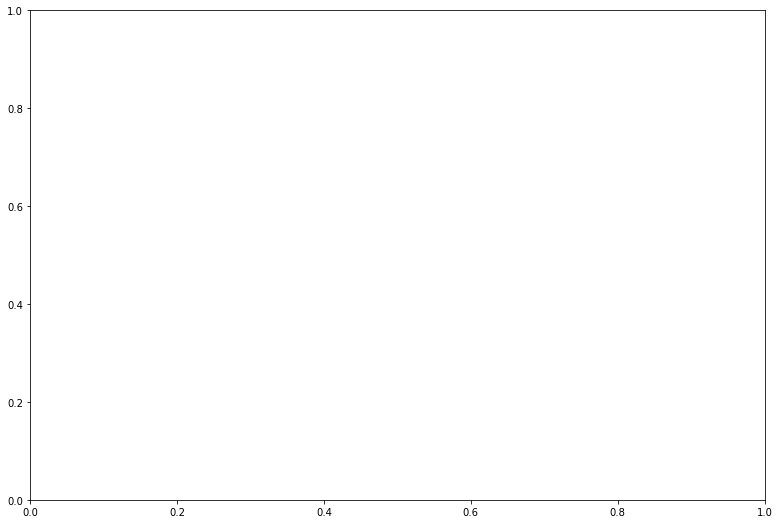

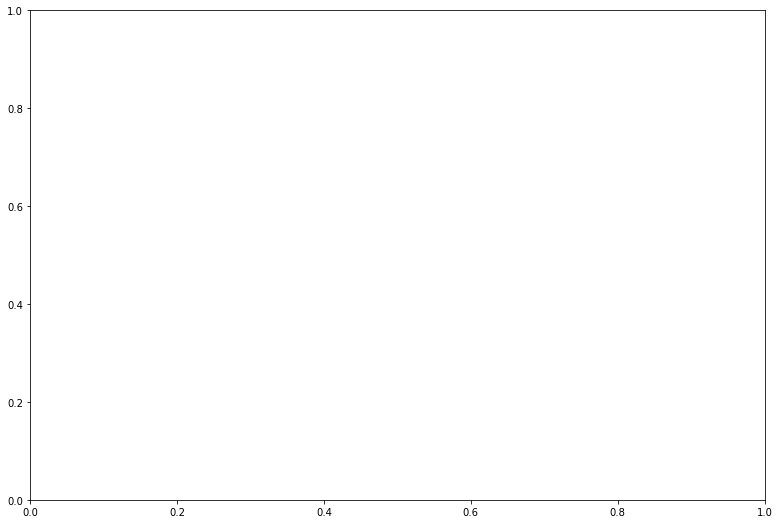

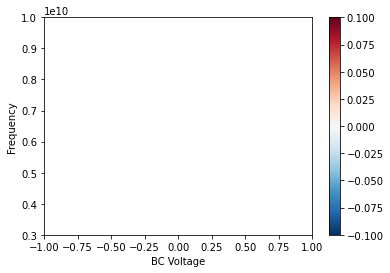

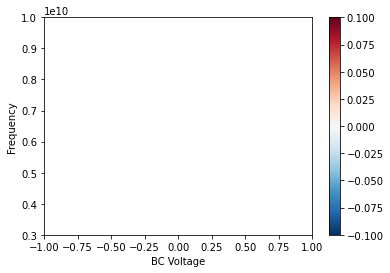

First sweep...Voltage set -1e+00 V
[-0.23124278+0.4201923j   0.34220597-0.1774846j  -0.21089898-0.01343032j
 ...  0.21057467-0.08536146j -0.1763473 -0.16664259j
 -0.05243253+0.33267045j]


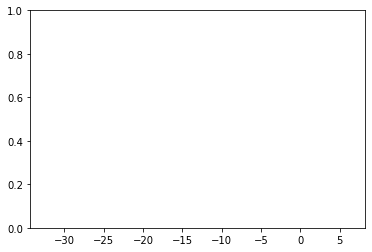

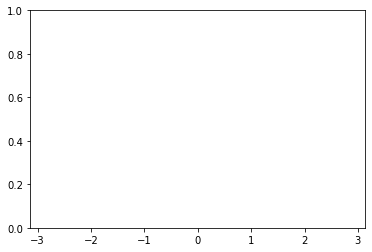

Time left: 0 h 0 m 4.9 s,	parameter values: BC Voltage:     -1,	average cycle time: 0.49s	Voltage set -8e-01 V
[-0.23125289+0.42018601j  0.34219861-0.1774947j  -0.21088368-0.0134306j
 ...  0.21057467-0.08536146j -0.1763473 -0.16664259j
 -0.05243253+0.33267045j]


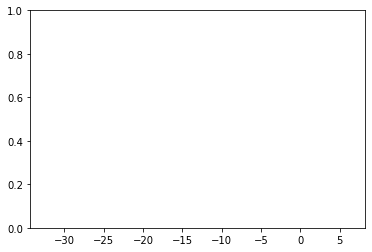

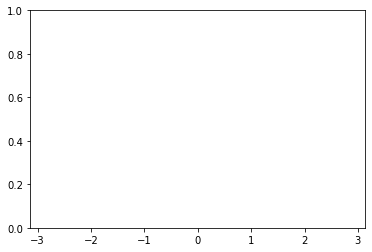

Time left: 0 h 0 m 4.56 s,	parameter values: BC Voltage:   -0.8,	average cycle time: 0.51s	Voltage set -6e-01 V
[-0.23125094+0.42018366j  0.34220344-0.1775191j  -0.21090269-0.0134089j
 ...  0.21057467-0.08536146j -0.1763473 -0.16664259j
 -0.05243253+0.33267045j]


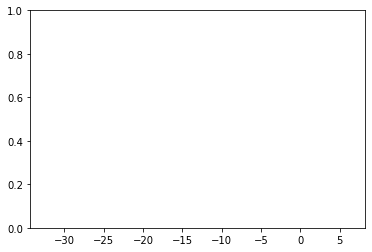

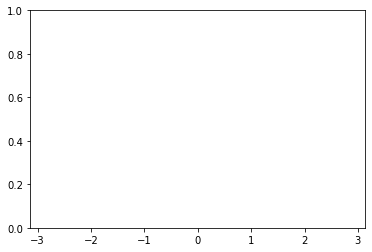

Time left: 0 h 0 m 4.13 s,	parameter values: BC Voltage:   -0.6,	average cycle time: 0.52s	Voltage set -4e-01 V
[-0.23125839+0.42019764j  0.34221584-0.17748849j -0.21088263-0.01343791j
 ...  0.21057467-0.08536146j -0.1763473 -0.16664259j
 -0.05243253+0.33267045j]


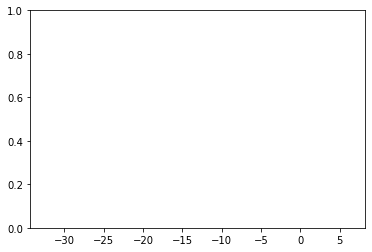

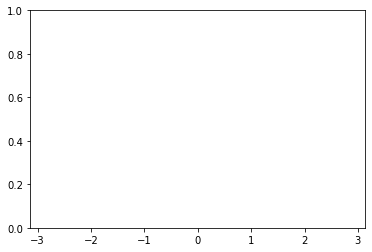

Time left: 0 h 0 m 3.62 s,	parameter values: BC Voltage:   -0.4,	average cycle time: 0.52s	Voltage set -2e-01 V
[-0.23128042+0.42018691j  0.34221601-0.17749113j -0.21086892-0.01344148j
 ...  0.21057467-0.08536146j -0.1763473 -0.16664259j
 -0.05243253+0.33267045j]


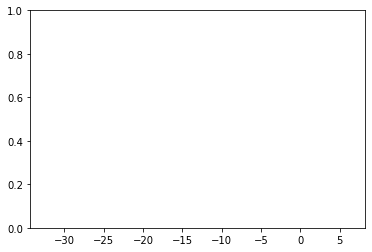

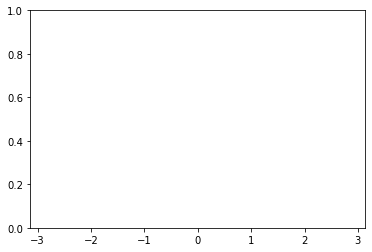

Time left: 0 h 0 m 3.24 s,	parameter values: BC Voltage:   -0.2,	average cycle time: 0.54s	Voltage set 0e+00 V
[-0.23125134+0.42021108j  0.34222007-0.17749298j -0.21093707-0.01341368j
 ...  0.21057467-0.08536146j -0.1763473 -0.16664259j
 -0.05243253+0.33267045j]


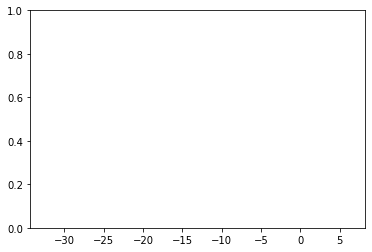

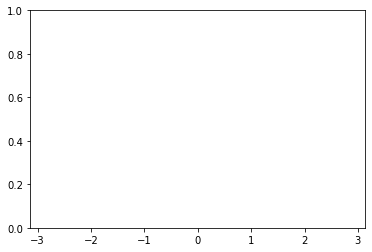

Time left: 0 h 0 m 2.69 s,	parameter values: BC Voltage:      0,	average cycle time: 0.54s	Voltage set 2e-01 V
[-0.23128429+0.42021188j  0.34223774-0.17748298j -0.21095207-0.0134211j
 ...  0.21057467-0.08536146j -0.1763473 -0.16664259j
 -0.05243253+0.33267045j]


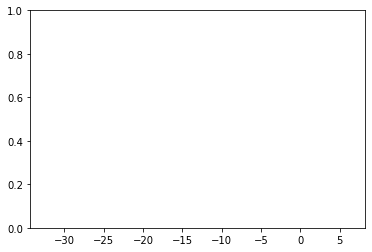

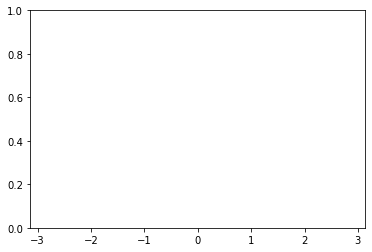

Time left: 0 h 0 m 2.17 s,	parameter values: BC Voltage:    0.2,	average cycle time: 0.54s	Voltage set 4e-01 V
[-0.23128609+0.42023113j  0.34227619-0.17749779j -0.21098651-0.01341923j
 ...  0.21057467-0.08536146j -0.1763473 -0.16664259j
 -0.05243253+0.33267045j]


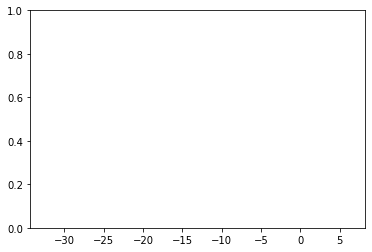

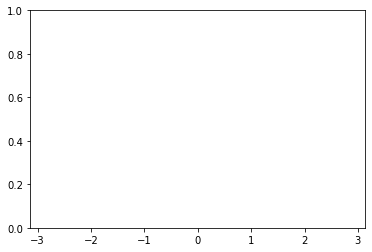

Time left: 0 h 0 m 1.63 s,	parameter values: BC Voltage:    0.4,	average cycle time: 0.54s	Voltage set 6e-01 V
[-0.23128328+0.42026252j  0.34228051-0.17750998j -0.21100001-0.01341919j
 ...  0.21057467-0.08536146j -0.1763473 -0.16664259j
 -0.05243253+0.33267045j]


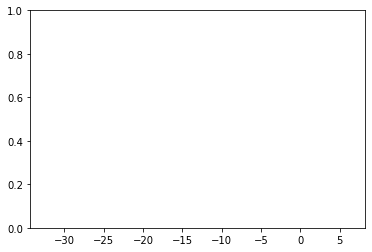

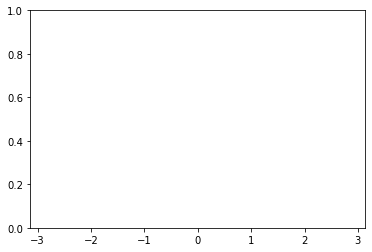

Time left: 0 h 0 m 1.08 s,	parameter values: BC Voltage:    0.6,	average cycle time: 0.54s	Voltage set 8e-01 V
[-0.2312692 +0.42021057j  0.34222257-0.17749727j -0.21096018-0.01339974j
 ...  0.21057467-0.08536146j -0.1763473 -0.16664259j
 -0.05243253+0.33267045j]


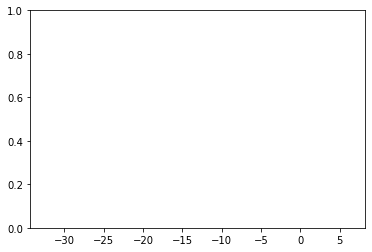

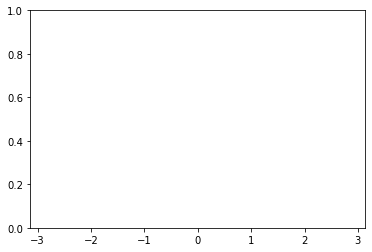

Time left: 0 h 0 m 0.54 s,	parameter values: BC Voltage:    0.8,	average cycle time: 0.54s	Voltage set 1e+00 V
[-0.23124163+0.42022842j  0.34222105-0.1774835j  -0.21095791-0.01339487j
 ...  0.21057467-0.08536146j -0.1763473 -0.16664259j
 -0.05243253+0.33267045j]


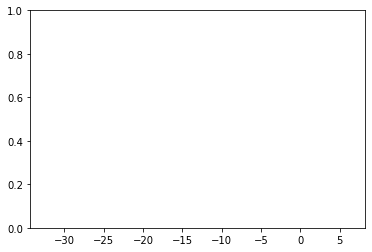

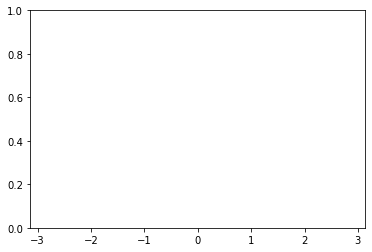

Time left: 0 h 0 m 0.0 s,	parameter values: BC Voltage:      1,	average cycle time: 0.54s	
Elapsed time: 0 h 0 m 6.0 s


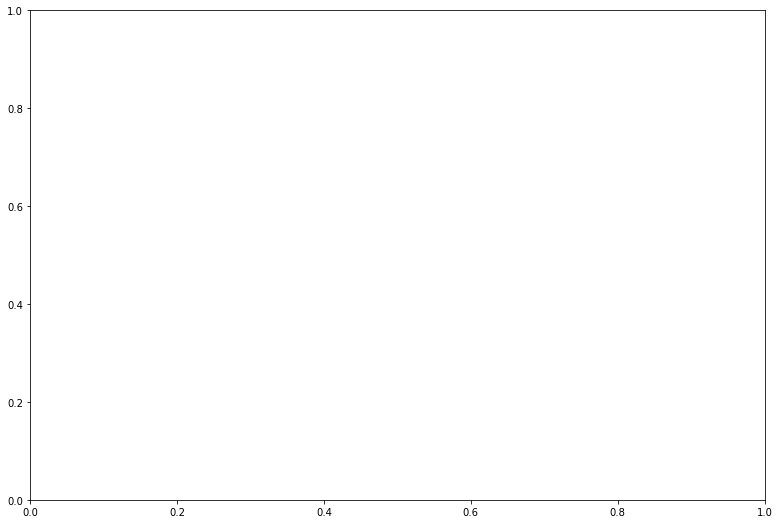

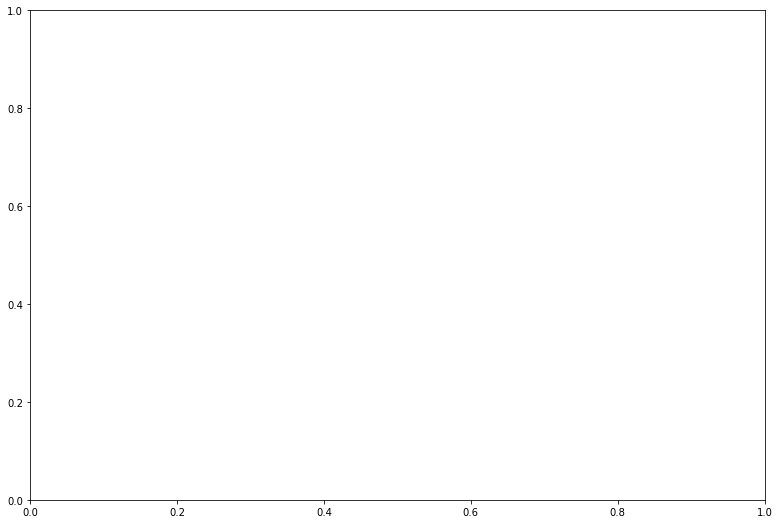

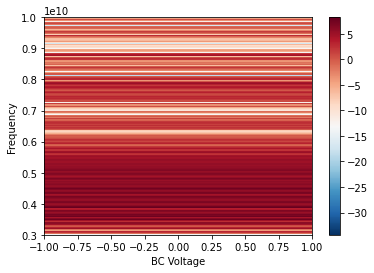

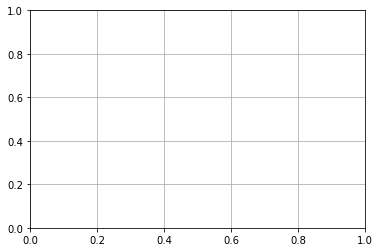

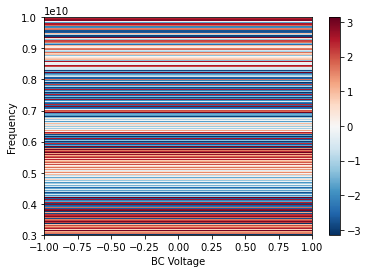

{'S-parameter': (('BC Voltage', 'Frequency'),
  (array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
   array([3.000e+09, 3.007e+09, 3.014e+09, ..., 9.986e+09, 9.993e+09,
          1.000e+10])),
  array([[-0.23124278+0.4201923j ,  0.34220597-0.1774846j ,
          -0.21089898-0.01343032j, ...,  0.21057467-0.08536146j,
          -0.1763473 -0.16664259j, -0.05243253+0.33267045j],
         [-0.23125289+0.42018601j,  0.34219861-0.1774947j ,
          -0.21088368-0.0134306j , ...,  0.21057467-0.08536146j,
          -0.1763473 -0.16664259j, -0.05243253+0.33267045j],
         [-0.23125094+0.42018366j,  0.34220344-0.1775191j ,
          -0.21090269-0.0134089j , ...,  0.21057467-0.08536146j,
          -0.1763473 -0.16664259j, -0.05243253+0.33267045j],
         ...,
         [-0.23128328+0.42026252j,  0.34228051-0.17750998j,
          -0.21100001-0.01341919j, ...,  0.21057467-0.08536146j,
          -0.1763473 -0.16664259j, -0.05243253+0.33267045j],
         [-0.2312692 +0.

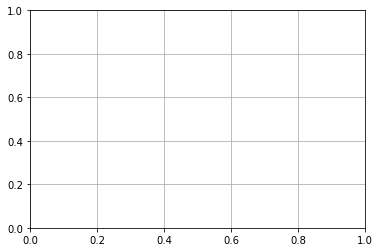

In [9]:
sweep.sweep(vna, (voltages, current_src_5.set_voltage, 'BC Voltage'), filename='Test sweep')

# American Magnets Model 430

In [4]:
magnet = American_Magnetics_430('magnet', address = 'Magnet')

Units are T/sec


In [5]:
def status():
    magnet_state = int(magnet.get_rampingstate())
    if (magnet_state == 1):
        print('RAMPING to target field/current')
    if (magnet_state == 2):
        print('HOLDING at the target field/current')
    if (magnet_state == 3):
        print('PAUSED')
    if (magnet_state == 4):
        print('Ramping in MANUAL UP mode')
    if (magnet_state == 5):
        print('Ramping in MANUAL DOWN mode')
    if (magnet_state == 6):
        print('ZEROING CURRENT (in progress)')
    if (magnet_state == 7):
        print('Quench detected')
    if (magnet_state == 8):
        print('At ZERO current')
    if (magnet_state == 9):
        print('Heating persistent switch')
    if (magnet_state == 10):
        print('Cooling persistent switch')

In [10]:
print('Magnet model: ' ,magnet.get_id())
if magnet.canstartramp():
    print('No quench')
print('Current limit: ' , magnet.get_currentlimit(), 'A') 
print('Voltage limit: ' , magnet.get_voltagelimit(), 'V') 
print('Field limit: ' , magnet.get_fieldlim(), 'T') 

print('Current Field: ' , magnet.get_field(), 'T') 
print('Target Field: ' , magnet.get_fieldsetpoint(), 'T') 

print('Current Current: ' , magnet.get_current(), 'A') 
print('Target Current: ' , magnet.get_currentsetpoint(), 'A') 

print('Ramp Rate: ' , magnet.get_ramprate(), 'T/sec') 
status()

Magnet model:  AMERICAN MAGNETICS INC.,MODEL 430,1.62
No quench
Current limit:  84.0 A
Voltage limit:  2.0 V
Field limit:  8.9964 T
Current Field:  -5e-05 T
Target Field:  0.0 T
Current Current:  0.0 A
Target Current:  0.0 A
Ramp Rate:  0.00031 T/sec
HOLDING at the target field/current


In [7]:
magnet.set_ramprate(0.00031)  # in T/sec

In [13]:
status()

HOLDING at the target field/current


In [16]:
magnet.ramp_field(0.000)

In [17]:
magnet.get_field()

-1e-05

Parts

In [10]:
import pyvisa

In [11]:
rm = pyvisa.ResourceManager()

In [12]:
rm.list_resources()

('ASRL1::INSTR',
 'ASRL3::INSTR',
 'ASRL4::INSTR',
 'GPIB1::5::INSTR',
 'GPIB0::10::INSTR',
 'GPIB0::16::INSTR',
 'GPIB0::17::INSTR',
 'GPIB0::1::INSTR',
 'GPIB0::22::INSTR',
 'GPIB0::26::INSTR',
 'GPIB0::2::INSTR',
 'GPIB0::3::INSTR',
 'GPIB0::4::INSTR',
 'GPIB0::5::INSTR',
 'GPIB0::6::INSTR',
 'GPIB0::7::INSTR',
 'GPIB0::8::INSTR',
 'GPIB0::9::0::INSTR',
 'TCPIP0::169.254.166.83::inst0::INSTR',
 'USB0::0x05FF::0x1023::2807N59061::0::INSTR',
 'USB0::0x0699::0x035E::C011901::0::INSTR',
 'USB0::0x0957::0x1796::MY51290236::0::INSTR',
 'USB0::0x0B5B::0xFFF9::1405051_776_47::0::INSTR',
 'USB0::0x2A8D::0xB318::MY59290070::0::INSTR')

In [32]:
my_instrument = rm.open_resource('GPIB1::5::INSTR', read_termination='\r\n')

In [36]:
print(my_instrument.query('COIL?'))

0.107100
